Importing the Dependencies

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection & Processing

In [87]:
# load the data from csv file to Pandas DataFrame
titanic_data = pd.read_csv('/content/tested.csv')

In [88]:
# printing the first 5 rows of the dataframe
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [89]:
# number of rows and Columns
titanic_data.shape

(418, 12)

In [90]:
# getting some informations about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [91]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Handling the Missing values

In [92]:
# drop the "Cabin" column from the dataframe
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [93]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [94]:
# replacing the missing values in "Age" column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [95]:
# finding the mode value of "Embarked" column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [96]:
print(titanic_data['Embarked'].mode()[0])

S


In [97]:
# replacing the missing values in "Embarked" column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)


In [98]:
titanic_data['Fare'].fillna(titanic_data['Fare'].mean(),inplace=True)

In [99]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Analysis

In [100]:
# getting some statistical measures about the data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [101]:
# finding the number of people survived and not survived
titanic_data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

Data Visualization

In [102]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

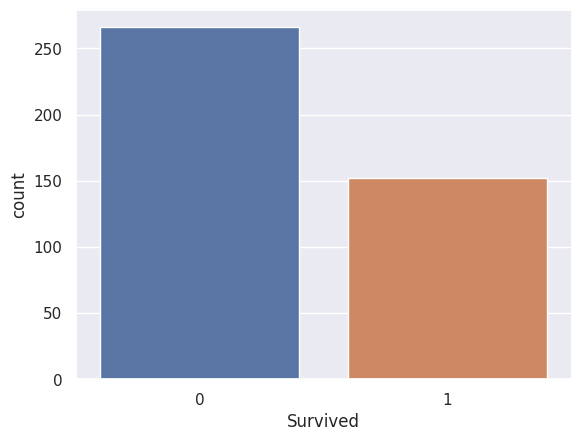

In [103]:
# making a count plot for "Survived" column
sns.countplot(x='Survived', data=titanic_data)

In [104]:
titanic_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

<Axes: xlabel='count', ylabel='Sex'>

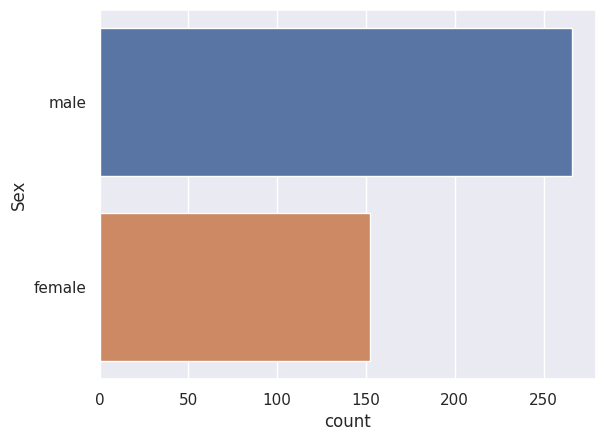

In [105]:
# making a count plot for "Sex" column
sns.countplot(y= 'Sex', data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

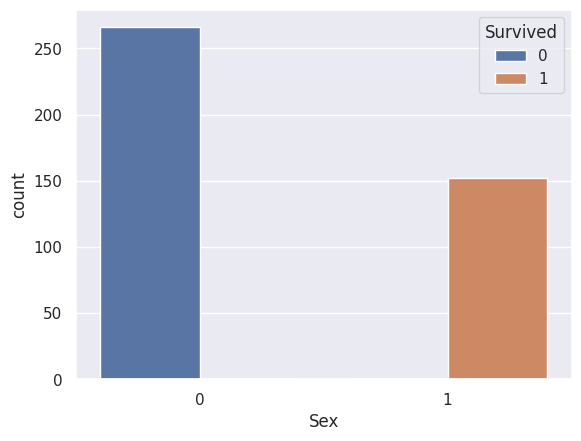

In [128]:
# number of survivors Gender wise
sns.countplot(x='Sex', hue='Survived', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

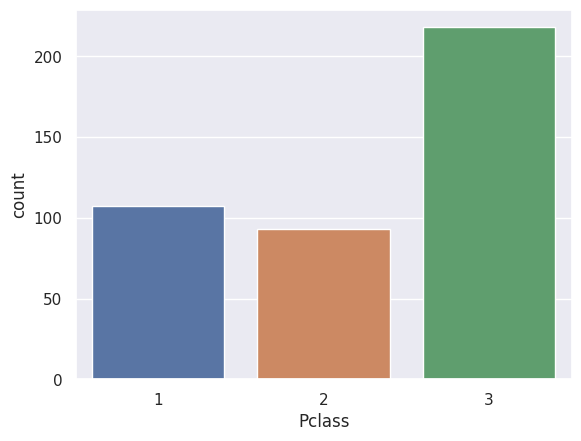

In [107]:
# making a count plot for "Pclass" column
sns.countplot(x='Pclass', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

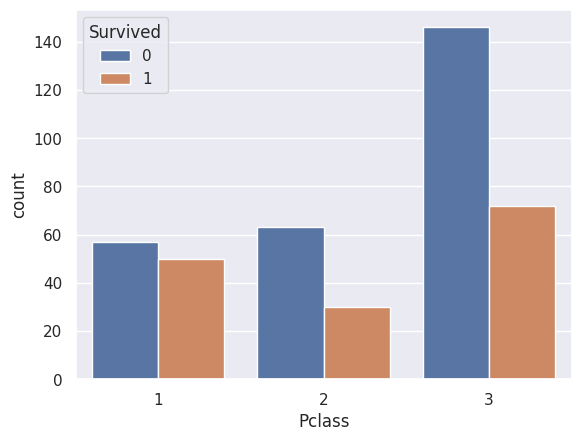

In [108]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

Encoding the Categorical Columns

In [109]:
titanic_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [110]:
titanic_data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [111]:
# converting categorical Columns

titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [112]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


Separating features & Target

In [113]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [114]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [115]:
print(X)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]


In [116]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


Splitting the data into training data & Test data

In [117]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [118]:
print(X.shape, X_train.shape, X_test.shape)

(418, 7) (334, 7) (84, 7)


In [129]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [146]:
# next checking the accuracy by using various kinds of ML Models

def ML_Models(X_train,Y_train):

  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors=5 , metric = 'minkowski',p =2 )
  knn.fit(X_train,Y_train)

  from sklearn.svm import SVC
  svc_linear = SVC(kernel='linear',random_state =0)
  svc_linear.fit(X_train,Y_train)

  from sklearn.tree import DecisionTreeClassifier
  DTree = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
  DTree.fit(X_train,Y_train)

  from sklearn.ensemble import RandomForestClassifier
  RFC = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state = 0)
  RFC.fit(X_train,Y_train)

  # printing the accuracy of each model

  print('[0]KNearest Neighbours Training Accuracy : ',knn.score(X_train,Y_train))
  print('[1]Support Vector Classifier in linear Training Accuracy : ',knn.score(X_train,Y_train))
  print('[2]Decision Tree Classifier Training Accuracy : ',DTree.score(X_train,Y_train))
  print('[3]Random Forest Classifier training Accuracy : ',RFC.score(X_train,Y_train))

  return knn,svc_linear,DTree,RFC





In [147]:
models = ML_Models(X_train,Y_train)

[0]KNearest Neighbours Training Accuracy :  0.9970059880239521
[1]Support Vector Classifier in linear Training Accuracy :  0.9970059880239521
[2]Decision Tree Classifier Training Accuracy :  1.0
[3]Random Forest Classifier training Accuracy :  1.0


In [148]:
# Obtaining the Confusion Matrix for all the models shown above for classification

from sklearn.metrics import confusion_matrix

for i in range(len(models)):
  cm = confusion_matrix(Y_test,models[i].predict(X_test))

  TN,FP,FN,TP = confusion_matrix(Y_test,models[i].predict(X_test)).ravel()

  test_score = (TP + TN) / ( TP + TN + FN + FP)

  print(cm)
  print('models[{}] Testing Accuracy = "{}" '.format(i,test_score))
  print()

[[51  0]
 [ 1 32]]
models[0] Testing Accuracy = "0.9880952380952381" 

[[51  0]
 [ 0 33]]
models[1] Testing Accuracy = "1.0" 

[[51  0]
 [ 0 33]]
models[2] Testing Accuracy = "1.0" 

[[51  0]
 [ 0 33]]
models[3] Testing Accuracy = "1.0" 



In [158]:
forest = models[3]
importances = pd.DataFrame({ 'feature': titanic_data.iloc[:, 1:8].columns,'importance': np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance', ascending= False).set_index('feature')
importances

,importance
feature,
Pclass,0.857
SibSp,0.061
Name,0.034
Sex,0.016
Parch,0.016
Age,0.012
Survived,0.005


<Axes: xlabel='feature'>

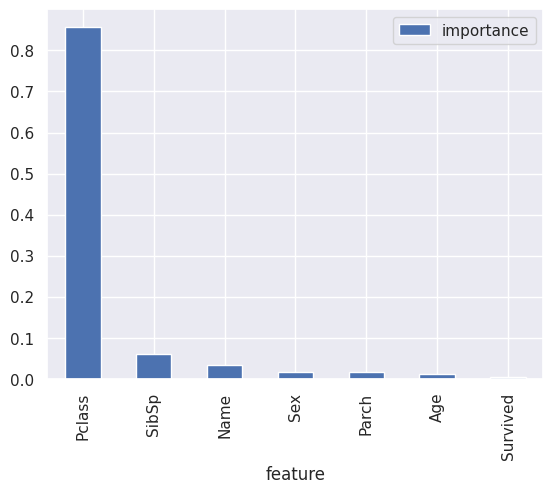

In [155]:
importances.plot.bar()

Model Training

Logistic Regression

In [119]:
model = LogisticRegression()

In [120]:
# training the Logistic Regression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation

Accuracy Score

In [121]:
# accuracy on training data
X_train_prediction = model.predict(X_train)

In [122]:
print(X_train_prediction)

[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1]


In [123]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  1.0


In [124]:
# accuracy on test data
X_test_prediction = model.predict(X_test)

In [125]:
print(X_test_prediction)

[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0]


In [126]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  1.0


In [160]:
# Predicting whether the person has survived or not depending on these factors
''' Pclass
SibSp
Name
Sex
Parch
Age
Survived'''

In [177]:
#survival_prob = [[3,1,20,0,0,0,1]]
survival_prob = [[1 ,1, 0, 1, 0, 0, 0,]]

# Scaling my survival
from sklearn.preprocessing import StandardScaler
sc = StandardScaler ()
survival_scale = sc.fit_transform(survival_prob)

#Print prediction of my survival using Random Forest Classifier
prediction = models[3].predict(survival_scale)
print(prediction)

if prediction == 0:
  print('Sorry,You didnt Survive')
else:
  print('Nice! You survived !')

[0]
Sorry,You didnt Survive
